In [92]:
#importing libraries to use on our web scraping and analysis
import requests
from bs4 import BeautifulSoup
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns



## Phase 1: Web-Scapping Using BeautifulSoup

In [93]:
# website URL to scrap
url = "https://dummyjson.com/products" 

In [94]:
# to collect data from the website
r = requests 

In [95]:
## using if statements to check if url is reachable
response = r.get(url)
if response.status_code == 200:
    print("Request was successful!")       
  
else:
    print(f"Request failed with status code: {response.status_code}")



Request was successful!


In [96]:
## Our Data is in Json format, which is unstructured
soup = BeautifulSoup(response.text)
data = response.json() #to change the json format to pritty print and be easily readable 

In [97]:
data

{'products': [{'id': 1,
   'title': 'Essence Mascara Lash Princess',
   'description': 'The Essence Mascara Lash Princess is a popular mascara known for its volumizing and lengthening effects. Achieve dramatic lashes with this long-lasting and cruelty-free formula.',
   'category': 'beauty',
   'price': 9.99,
   'discountPercentage': 7.17,
   'rating': 4.94,
   'stock': 5,
   'tags': ['beauty', 'mascara'],
   'brand': 'Essence',
   'sku': 'RCH45Q1A',
   'weight': 2,
   'dimensions': {'width': 23.17, 'height': 14.43, 'depth': 28.01},
   'warrantyInformation': '1 month warranty',
   'shippingInformation': 'Ships in 1 month',
   'availabilityStatus': 'Low Stock',
   'reviews': [{'rating': 2,
     'comment': 'Very unhappy with my purchase!',
     'date': '2024-05-23T08:56:21.618Z',
     'reviewerName': 'John Doe',
     'reviewerEmail': 'john.doe@x.dummyjson.com'},
    {'rating': 2,
     'comment': 'Not as described!',
     'date': '2024-05-23T08:56:21.618Z',
     'reviewerName': 'Nolan Gon

In [98]:
# convert to a dataframe and displaying all columns
products_df = pd.DataFrame(data['products']) 
pd.set_option('display.max_columns', None) 

In [99]:
products_df 

,id,title,description,category,price,discountPercentage,rating,stock,tags,brand,sku,weight,dimensions,warrantyInformation,shippingInformation,availabilityStatus,reviews,returnPolicy,minimumOrderQuantity,meta,images,thumbnail
0,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,9.99,7.17,4.94,5,"[beauty, mascara]",Essence,RCH45Q1A,2,"{'width': 23.17, 'height': 14.43, 'depth': 28.01}",1 month warranty,Ships in 1 month,Low Stock,"[{'rating': 2, 'comment': 'Very unhappy with m...",30 days return policy,24,"{'createdAt': '2024-05-23T08:56:21.618Z', 'upd...",[https://cdn.dummyjson.com/products/images/bea...,https://cdn.dummyjson.com/products/images/beau...
1,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,19.99,5.50,3.28,44,"[beauty, eyeshadow]",Glamour Beauty,MVCFH27F,3,"{'width': 12.42, 'height': 8.63, 'depth': 29.13}",1 year warranty,Ships in 2 weeks,In Stock,"[{'rating': 4, 'comment': 'Very satisfied!', '...",30 days return policy,32,"{'createdAt': '2024-05-23T08:56:21.618Z', 'upd...",[https://cdn.dummyjson.com/products/images/bea...,https://cdn.dummyjson.com/products/images/beau...
2,3,Powder Canister,The Powder Canister is a finely milled setting...,beauty,14.99,18.14,3.82,59,"[beauty, face powder]",Velvet Touch,9EN8WLT2,8,"{'width': 24.16, 'height': 10.7, 'depth': 11.07}",2 year warranty,Ships in 1-2 business days,In Stock,"[{'rating': 5, 'comment': 'Very happy with my ...",60 days return policy,25,"{'createdAt': '2024-05-23T08:56:21.618Z', 'upd...",[https://cdn.dummyjson.com/products/images/bea...,https://cdn.dummyjson.com/products/images/beau...
3,4,Red Lipstick,The Red Lipstick is a classic and bold choice ...,beauty,12.99,19.03,2.51,68,"[beauty, lipstick]",Chic Cosmetics,O5IF1NTA,5,"{'width': 14.37, 'height': 13.94, 'depth': 14.6}",Lifetime warranty,Ships in 2 weeks,In Stock,"[{'rating': 5, 'comment': 'Great product!', 'd...",90 days return policy,6,"{'createdAt': '2024-05-23T08:56:21.619Z', 'upd...",[https://cdn.dummyjson.com/products/images/bea...,https://cdn.dummyjson.com/products/images/beau...
4,5,Red Nail Polish,The Red Nail Polish offers a rich and glossy r...,beauty,8.99,2.46,3.91,71,"[beauty, nail polish]",Nail Couture,YUIIIP4W,9,"{'width': 8.11, 'height': 10.89, 'depth': 29.06}",1 year warranty,Ships in 1 week,In Stock,"[{'rating': 5, 'comment': 'Very pleased!', 'da...",No return policy,46,"{'createdAt': '2024-05-23T08:56:21.619Z', 'upd...",[https://cdn.dummyjson.com/products/images/bea...,https://cdn.dummyjson.com/products/images/beau...
5,6,Calvin Klein CK One,CK One by Calvin Klein is a classic unisex fra...,fragrances,49.99,0.32,4.85,17,"[fragrances, perfumes]",Calvin Klein,DZM2JQZE,5,"{'width': 11.53, 'height': 14.44, 'depth': 6.81}",5 year warranty,Ships overnight,In Stock,"[{'rating': 5, 'comment': 'Great value for mon...",No return policy,20,"{'createdAt': '2024-05-23T08:56:21.619Z', 'upd...",[https://cdn.dummyjson.com/products/images/fra...,https://cdn.dummyjson.com/products/images/frag...
6,7,Chanel Coco Noir Eau De,Coco Noir by Chanel is an elegant and mysterio...,fragrances,129.99,18.64,2.76,41,"[fragrances, perfumes]",Chanel,K71HBCGS,4,"{'width': 21.27, 'height': 28, 'depth': 11.89}",1 week warranty,Ships in 1 month,In Stock,"[{'rating': 1, 'comment': 'Disappointing produ...",60 days return policy,5,"{'createdAt': '2024-05-23T08:56:21.619Z', 'upd...",[https://cdn.dummyjson.com/products/images/fra...,https://cdn.dummyjson.com/products/images/frag...
7,8,Dior J'adore,J'adore by Dior is a luxurious and floral frag...,fragrances,89.99,17.44,3.31,91,"[fragrances, perfumes]",Dior,E70NB03B,10,"{'width': 21.51, 'height': 7, 'depth': 26.51}",Lifetime warranty,Ships in 2 weeks,In Stock,"[{'rating': 5, 'comment': 'Fast shipping!', 'd...",7 days return policy,8,"{'createdAt': '2024-05-23T08:56:21.619Z', 'upd...",[https://cdn.dummyjson.com/products/images/fra...,https://cdn.dummyjson.com/products/images/frag...
8,9,Dolce Shine Eau de,

In [100]:
products_df.drop(columns = ['images','thumbnail']) # Removing columns that we don't need

,id,title,description,category,price,discountPercentage,rating,stock,tags,brand,sku,weight,dimensions,warrantyInformation,shippingInformation,availabilityStatus,reviews,returnPolicy,minimumOrderQuantity,meta
0,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,9.99,7.17,4.94,5,"[beauty, mascara]",Essence,RCH45Q1A,2,"{'width': 23.17, 'height': 14.43, 'depth': 28.01}",1 month warranty,Ships in 1 month,Low Stock,"[{'rating': 2, 'comment': 'Very unhappy with m...",30 days return policy,24,"{'createdAt': '2024-05-23T08:56:21.618Z', 'upd..."
1,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,19.99,5.50,3.28,44,"[beauty, eyeshadow]",Glamour Beauty,MVCFH27F,3,"{'width': 12.42, 'height': 8.63, 'depth': 29.13}",1 year warranty,Ships in 2 weeks,In Stock,"[{'rating': 4, 'comment': 'Very satisfied!', '...",30 days return policy,32,"{'createdAt': '2024-05-23T08:56:21.618Z', 'upd..."
2,3,Powder Canister,The Powder Canister is a finely milled setting...,beauty,14.99,18.14,3.82,59,"[beauty, face powder]",Velvet Touch,9EN8WLT2,8,"{'width': 24.16, 'height': 10.7, 'depth': 11.07}",2 year warranty,Ships in 1-2 business days,In Stock,"[{'rating': 5, 'comment': 'Very happy with my ...",60 days return policy,25,"{'createdAt': '2024-05-23T08:56:21.618Z', 'upd..."
3,4,Red Lipstick,The Red Lipstick is a classic and bold choice ...,beauty,12.99,19.03,2.51,68,"[beauty, lipstick]",Chic Cosmetics,O5IF1NTA,5,"{'width': 14.37, 'height': 13.94, 'depth': 14.6}",Lifetime warranty,Ships in 2 weeks,In Stock,"[{'rating': 5, 'comment': 'Great product!', 'd...",90 days return policy,6,"{'createdAt': '2024-05-23T08:56:21.619Z', 'upd..."
4,5,Red Nail Polish,The Red Nail Polish offers a rich and glossy r...,beauty,8.99,2.46,3.91,71,"[beauty, nail polish]",Nail Couture,YUIIIP4W,9,"{'width': 8.11, 'height': 10.89, 'depth': 29.06}",1 year warranty,Ships in 1 week,In Stock,"[{'rating': 5, 'comment': 'Very pleased!', 'da...",No return policy,46,"{'createdAt': '2024-05-23T08:56:21.619Z', 'upd..."
5,6,Calvin Klein CK One,CK One by Calvin Klein is a classic unisex fra...,fragrances,49.99,0.32,4.85,17,"[fragrances, perfumes]",Calvin Klein,DZM2JQZE,5,"{'width': 11.53, 'height': 14.44, 'depth': 6.81}",5 year warranty,Ships overnight,In Stock,"[{'rating': 5, 'comment': 'Great value for mon...",No return policy,20,"{'createdAt': '2024-05-23T08:56:21.619Z', 'upd..."
6,7,Chanel Coco Noir Eau De,Coco Noir by Chanel is an elegant and mysterio...,fragrances,129.99,18.64,2.76,41,"[fragrances, perfumes]",Chanel,K71HBCGS,4,"{'width': 21.27, 'height': 28, 'depth': 11.89}",1 week warranty,Ships in 1 month,In Stock,"[{'rating': 1, 'comment': 'Disappointing produ...",60 days return policy,5,"{'createdAt': '2024-05-23T08:56:21.619Z', 'upd..."
7,8,Dior J'adore,J'adore by Dior is a luxurious and floral frag...,fragrances,89.99,17.44,3.31,91,"[fragrances, perfumes]",Dior,E70NB03B,10,"{'width': 21.51, 'height': 7, 'depth': 26.51}",Lifetime warranty,Ships in 2 weeks,In Stock,"[{'rating': 5, 'comment': 'Fast shipping!', 'd...",7 days return policy,8,"{'createdAt': '2024-05-23T08:56:21.619Z', 'upd..."
8,9,Dolce Shine Eau de,Dolce Shine by Dolce & Gabbana is a vibrant an...,fragrances,69.99,11.47,2.68,3,"[fragrances, perfumes]",Dolce & Gabbana,1NBFK980,5,"{'width': 17, 'height': 24.57, 'depth': 13.3}",5 year warranty,Ships in 1-2 business days,Low Stock,"[{'rating': 4, 'comment': 'Very satisfied!', '...",30 days return policy,9,"{'createdAt': '2024-05-23T08:56:21.619Z', 'upd..."
9,10,Gucci Bloom Eau de,Gucci Bloom by Gucci is a floral and captivati...,fragrances,79.99,8.90,2.69,93,"[fragrances, perfumes]",Gucci,FFKZ6HOF,10,"{'width': 22.28, 'height': 17.81, 'depth': 27.18}",No warranty,Ships in 2 weeks,In Stock,"[{'rating': 5, 'comment': 'Great value for mon...",No return policy,10,"{'createdAt': '2024-05-23T08:56:21.620Z', 'upd..."


In [101]:
## extracting columns to be used for analysis
New_df = products_df[['title','price','rating','availabilityStatus','reviews']]

In [102]:
## renaming columns of our new dataframe
Data_df = New_df.rename(columns ={'title': 'Product name', 'price': 'Price', 'rating': 'Rating', 'availabilityStatus': 'Availability', 'reviews': 'Review count'})

In [103]:
## saving data as csv
Data_df.to_csv('Clean Data.csv')

## Phase 2 : Working with Pandas

In [104]:
## reading the dowmnloaded csv file
df = pd.read_csv(r"C:\Users\Adons Feliciah\Downloads\cleaned data.xls")  

In [105]:
df

,Unnamed: 0,Product name,Price,Rating,Availability,Reviews
0,0,Essence Mascara Lash Princess,9.99,4.94,Low Stock,"[{'rating': 2, 'comment': 'Very unhappy with m..."
1,1,Eyeshadow Palette with Mirror,19.99,3.28,In Stock,"[{'rating': 4, 'comment': 'Very satisfied!', '..."
2,2,Powder Canister,14.99,3.82,In Stock,"[{'rating': 5, 'comment': 'Very happy with my ..."
3,3,Red Lipstick,12.99,2.51,In Stock,"[{'rating': 5, 'comment': 'Great product!', 'd..."
4,4,Red Nail Polish,8.99,3.91,In Stock,"[{'rating': 5, 'comment': 'Very pleased!', 'da..."
5,5,Calvin Klein CK One,49.99,4.85,In Stock,"[{'rating': 5, 'comment': 'Great value for mon..."
6,6,Chanel Coco Noir Eau De,129.99,2.76,In Stock,"[{'rating': 1, 'comment': 'Disappointing produ..."
7,7,Dior J'adore,89.99,3.31,In Stock,"[{'rating': 5, 'comment': 'Fast shipping!', 'd..."
8,8,Dolce Shine Eau de,69.99,2.68,Low Stock,"[{'rating': 4, 'comment': 'Very satisfied!', '..."
9,9,Gucci Bloom Eau de,79.99,2.69,In Stock,"[{'rating': 5, 'comment': 'Great value for mon..."


## Data Cleaning process

In [106]:
#Dropping unwanted columns
Clean_1 = df.drop(columns = ['Unnamed: 0']) 
Clean_1

,Product name,Price,Rating,Availability,Reviews
0,Essence Mascara Lash Princess,9.99,4.94,Low Stock,"[{'rating': 2, 'comment': 'Very unhappy with m..."
1,Eyeshadow Palette with Mirror,19.99,3.28,In Stock,"[{'rating': 4, 'comment': 'Very satisfied!', '..."
2,Powder Canister,14.99,3.82,In Stock,"[{'rating': 5, 'comment': 'Very happy with my ..."
3,Red Lipstick,12.99,2.51,In Stock,"[{'rating': 5, 'comment': 'Great product!', 'd..."
4,Red Nail Polish,8.99,3.91,In Stock,"[{'rating': 5, 'comment': 'Very pleased!', 'da..."
5,Calvin Klein CK One,49.99,4.85,In Stock,"[{'rating': 5, 'comment': 'Great value for mon..."
6,Chanel Coco Noir Eau De,129.99,2.76,In Stock,"[{'rating': 1, 'comment': 'Disappointing produ..."
7,Dior J'adore,89.99,3.31,In Stock,"[{'rating': 5, 'comment': 'Fast shipping!', 'd..."
8,Dolce Shine Eau de,69.99,2.68,Low Stock,"[{'rating': 4, 'comment': 'Very satisfied!', '..."
9,Gucci Bloom Eau de,79.99,2.69,In Stock,"[{'rating': 5, 'comment': 'Great value for mon..."


## Checking Duplicates and missing values

In [107]:
Clean_1.duplicated()     ## checking for duplicates

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [108]:
# No Duplicates Found

In [109]:
Clean_1.isnull() # checking missing values

,Product name,Price,Rating,Availability,Reviews
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [110]:
# No missing Values Found

# Converting price columns to numerical values

In [111]:
### Our data needs no convention

In [112]:
Clean_1

,Product name,Price,Rating,Availability,Reviews
0,Essence Mascara Lash Princess,9.99,4.94,Low Stock,"[{'rating': 2, 'comment': 'Very unhappy with m..."
1,Eyeshadow Palette with Mirror,19.99,3.28,In Stock,"[{'rating': 4, 'comment': 'Very satisfied!', '..."
2,Powder Canister,14.99,3.82,In Stock,"[{'rating': 5, 'comment': 'Very happy with my ..."
3,Red Lipstick,12.99,2.51,In Stock,"[{'rating': 5, 'comment': 'Great product!', 'd..."
4,Red Nail Polish,8.99,3.91,In Stock,"[{'rating': 5, 'comment': 'Very pleased!', 'da..."
5,Calvin Klein CK One,49.99,4.85,In Stock,"[{'rating': 5, 'comment': 'Great value for mon..."
6,Chanel Coco Noir Eau De,129.99,2.76,In Stock,"[{'rating': 1, 'comment': 'Disappointing produ..."
7,Dior J'adore,89.99,3.31,In Stock,"[{'rating': 5, 'comment': 'Fast shipping!', 'd..."
8,Dolce Shine Eau de,69.99,2.68,Low Stock,"[{'rating': 4, 'comment': 'Very satisfied!', '..."
9,Gucci Bloom Eau de,79.99,2.69,In Stock,"[{'rating': 5, 'comment': 'Great value for mon..."


In [113]:
## Extracting numbers (ratings) from the Review count column
Clean_1["ratings"] = Clean_1["Reviews"].astype(str).str.extract(r"(\d+)").astype(int) 

In [114]:
Clean_1

,Product name,Price,Rating,Availability,Reviews,ratings
0,Essence Mascara Lash Princess,9.99,4.94,Low Stock,"[{'rating': 2, 'comment': 'Very unhappy with m...",2
1,Eyeshadow Palette with Mirror,19.99,3.28,In Stock,"[{'rating': 4, 'comment': 'Very satisfied!', '...",4
2,Powder Canister,14.99,3.82,In Stock,"[{'rating': 5, 'comment': 'Very happy with my ...",5
3,Red Lipstick,12.99,2.51,In Stock,"[{'rating': 5, 'comment': 'Great product!', 'd...",5
4,Red Nail Polish,8.99,3.91,In Stock,"[{'rating': 5, 'comment': 'Very pleased!', 'da...",5
5,Calvin Klein CK One,49.99,4.85,In Stock,"[{'rating': 5, 'comment': 'Great value for mon...",5
6,Chanel Coco Noir Eau De,129.99,2.76,In Stock,"[{'rating': 1, 'comment': 'Disappointing produ...",1
7,Dior J'adore,89.99,3.31,In Stock,"[{'rating': 5, 'comment': 'Fast shipping!', 'd...",5
8,Dolce Shine Eau de,69.99,2.68,Low Stock,"[{'rating': 4, 'comment': 'Very satisfied!', '...",4
9,Gucci Bloom Eau de,79.99,2.69,In Stock,"[{'rating': 5, 'comment': 'Great value for mon...",5


In [115]:
 ## removing review count column
Clean_2 = Clean_1.drop(columns = "Reviews")

In [116]:
# renaming ratings columns to review count
Cleaned_Data = Clean_2.rename(columns ={'ratings': 'Review count'}) 
Cleaned_Data

,Product name,Price,Rating,Availability,Review count
0,Essence Mascara Lash Princess,9.99,4.94,Low Stock,2
1,Eyeshadow Palette with Mirror,19.99,3.28,In Stock,4
2,Powder Canister,14.99,3.82,In Stock,5
3,Red Lipstick,12.99,2.51,In Stock,5
4,Red Nail Polish,8.99,3.91,In Stock,5
5,Calvin Klein CK One,49.99,4.85,In Stock,5
6,Chanel Coco Noir Eau De,129.99,2.76,In Stock,1
7,Dior J'adore,89.99,3.31,In Stock,5
8,Dolce Shine Eau de,69.99,2.68,Low Stock,4
9,Gucci Bloom Eau de,79.99,2.69,In Stock,5


In [117]:
## No outliers was found

## Phase 3: Exploratory Data Analysis

In [118]:
## Calling out the two columns to work on.
EDA_Graph = Cleaned_Data[['Product name','Price']] 


In [119]:
## Sorting data by Price column in ascending order
Sorted_1 = EDA_Graph.sort_values(by='Price', ascending = True)
Sorted_1

,Product name,Price
25,Green Chili Pepper,0.99
24,Green Bell Pepper,1.29
20,Cucumber,1.49
15,Apple,1.99
29,Kiwi,2.49
22,Eggs,2.99
28,Juice,3.99
19,Cooking Oil,4.99
27,Ice Cream,5.49
26,Honey Jar,6.99


In [120]:
## Minimum prices
Lowest_Price = Sorted_1.head(20)
Lowest_Price

,Product name,Price
25,Green Chili Pepper,0.99
24,Green Bell Pepper,1.29
20,Cucumber,1.49
15,Apple,1.99
29,Kiwi,2.49
22,Eggs,2.99
28,Juice,3.99
19,Cooking Oil,4.99
27,Ice Cream,5.49
26,Honey Jar,6.99


In [121]:
# Highest Prices
Highest_Prices = Sorted_1.tail(10)
Highest_Prices

,Product name,Price
5,Calvin Klein CK One,49.99
8,Dolce Shine Eau de,69.99
9,Gucci Bloom Eau de,79.99
7,Dior J'adore,89.99
6,Chanel Coco Noir Eau De,129.99
12,Bedside Table African Cherry,299.99
13,Knoll Saarinen Executive Conference Chair,499.99
14,Wooden Bathroom Sink With Mirror,799.99
10,Annibale Colombo Bed,1899.99
11,Annibale Colombo Sofa,2499.99


Text(0.5, 1.0, 'HIGHEST PRICE DISTRIBUTION BAR GRAPH')

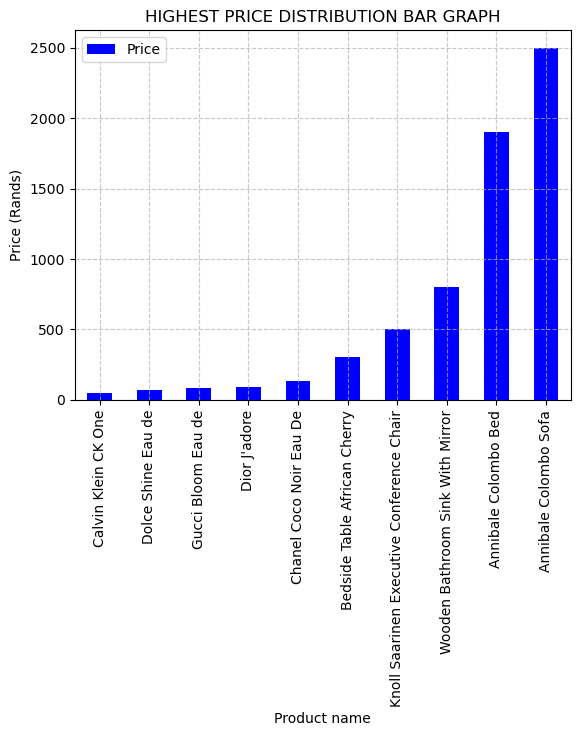

In [122]:
# Graph showing products that are more than 20 Rands
Highest_Prices.plot.bar(x='Product name', y='Price', color = 'blue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Price (Rands)')
plt.title('HIGHEST PRICE DISTRIBUTION BAR GRAPH')


Text(0.5, 1.0, 'LOWEST PRICE DISTRIBUTION BAR GRAPH')

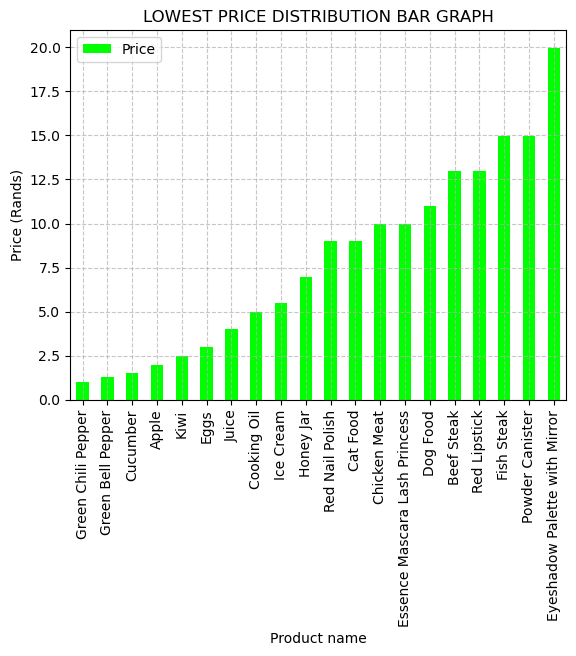

In [123]:
# Graph showing products that are less than 20 Rands
Lowest_Price.plot.bar(x='Product name', y='Price', color = 'lime')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Price (Rands)')
plt.title('LOWEST PRICE DISTRIBUTION BAR GRAPH')

In [124]:
# Sorting Product name and Rating columns in ascending order
Top_5 = Cleaned_Data[['Product name','Rating']].sort_values(by='Rating', ascending = True)

## Top 5 Rated products

In [125]:
# Top-rated Products
Top_5.tail() #Top 5 tail

,Product name,Rating
18,Chicken Meat,4.61
20,Cucumber,4.71
23,Fish Steak,4.83
5,Calvin Klein CK One,4.85
0,Essence Mascara Lash Princess,4.94


## Correlation

In [126]:
#Extracting Price and Rating columns
Clean_1 = Cleaned_Data[['Price','Rating']]
Clean_1

,Price,Rating
0,9.99,4.94
1,19.99,3.28
2,14.99,3.82
3,12.99,2.51
4,8.99,3.91
5,49.99,4.85
6,129.99,2.76
7,89.99,3.31
8,69.99,2.68
9,79.99,2.69


## Using Scatter plot to identify correlation between Prices and Ratings

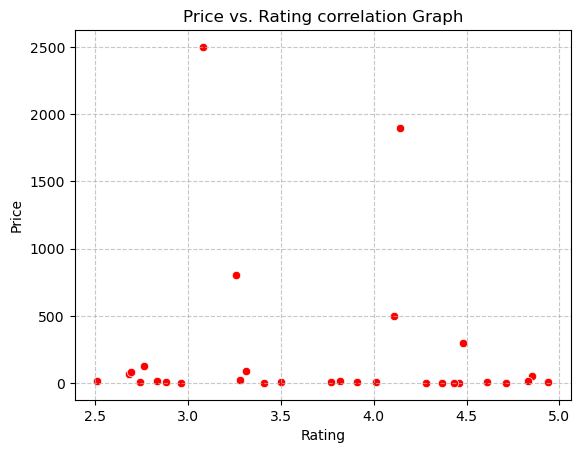

In [127]:
sns.scatterplot(data=Clean_1, x='Rating', y='Price', color='red')
plt.title('Price vs. Rating correlation Graph')
plt.grid(True, linestyle='--', alpha=0.7)

In [128]:
## 

In [129]:
Clean_1.corr()

,Price,Rating
Price,1.000000,-0.079764
Rating,-0.079764,1.000000


## Phase 4: Insights & Recommendations

## Using NUMPY

In [130]:
## What are the average prices of products?

In [131]:
Price = Cleaned_Data['Price'].sum() #to calculate the sum of prices

In [132]:
Products = Cleaned_Data['Product name'].nunique() # calculating 

In [133]:
Price // Products # calculating the range

219.0

## What price range has the best-rated products?

In [134]:
Clean_2 = Clean_1.sort_values(by='Rating', ascending = True)
Clean_2

,Price,Rating
3,12.99,2.51
8,69.99,2.68
9,79.99,2.69
21,10.99,2.74
6,129.99,2.76
16,12.99,2.83
17,8.99,2.88
15,1.99,2.96
11,2499.99,3.08
14,799.99,3.26


In [135]:
Cleans = Clean_2.tail(13) #calling out the Top 13 products by ratings

In [136]:
Max = Cleans.max() 


In [137]:
Min = Cleans.min()

In [138]:
Price_Range = Max - Min

In [139]:
Price_Range

Price     1899.00
Rating       0.93
dtype: float64

In [140]:
## The Price Range is 1899.00



In [141]:
## There are no Seasional Trends

In [142]:
## We have an extremely high outlies